## Exploratory Data Analysis - Customer Loans in Finance

This notebook documents the process of performing Exploratory Data Analysis (EDA) on the customer loans dataset. The following tasks will be covered:

1. Convert columns to the correct format
2. Create a class to get information from the DataFrame
3. Remove/impute missing values in the data
4. Perform transformation on skewed columns
5. Remove outliers from the data
6. Drop overly correlated columns


# Task 1: Convert Columns to the Correct Format

We will start by converting columns to the correct format. This includes converting columns to numeric, datetime, or categorical types, and removing symbols.

In [1]:
# Convert Columns to the Correct Format

import pandas as pd
from data_transform import DataTransform

# Load the CSV file
original_csv_file_path = 'D:\\Aicore\\EDA_Project\\exploratory-data-analysis---customer-loans-in-finance192\\loan_payments.csv'
df = pd.read_csv(original_csv_file_path)

# Initialize DataTransform with the DataFrame
transformer = DataTransform(df)

# Apply transformations
transformed_df = transformer.apply_transformations()

# Save the transformed DataFrame back to CSV
transformed_csv_file_path = 'D:\\Aicore\\EDA_Project\\exploratory-data-analysis---customer-loans-in-finance192\\transformed_loan_payments.csv'
transformed_df.to_csv(transformed_csv_file_path, index=False)
print(f"Transformed data saved to {transformed_csv_file_path}")


Transformed data saved to D:\Aicore\EDA_Project\exploratory-data-analysis---customer-loans-in-finance192\transformed_loan_payments.csv


## Task 2: Create a Class to Get Information from the DataFrame

Next, we will create a `DataFrameInfo` class to extract useful information from the DataFrame.


In [2]:
# Create a Class to Get Information from the DataFrame

from dataframe_info import DataFrameInfo

# Creating an instance of DataFrameInfo with the transformed DataFrame
df_info = DataFrameInfo(transformed_df)

# Example 
print("Column Descriptions:\n", df_info.describe_columns())
print("\nStatistics:\n", df_info.extract_statistics())
print("\nDistinct Values Count in Categorical Columns:\n", df_info.count_distinct_values())
print("\nDataFrame Shape:\n", df_info.shape())
print("\nNULL Values Count:\n", df_info.null_values_count())
print("\nHead:\n", df_info.head())
print("\nTail:\n", df_info.tail())
print("\nUnique Values in 'loan_status':\n", df_info.unique_values('loan_status'))


Column Descriptions:
 id                                int64
member_id                         int64
loan_amount                       int64
funded_amount                   float64
funded_amount_inv               float64
term                            float64
int_rate                        float64
instalment                      float64
grade                          category
sub_grade                      category
employment_length              category
home_ownership                 category
annual_inc                      float64
verification_status            category
issue_date                       object
loan_status                    category
payment_plan                   category
purpose                        category
dti                             float64
delinq_2yrs                       int64
earliest_credit_line             object
inq_last_6mths                    int64
mths_since_last_delinq          float64
mths_since_last_record          float64
open_accounts     

## Task 3: Remove/Impute Missing Values in the Data

We will remove columns with a high percentage of missing values and impute the remaining missing values using the median or mean.


In [3]:
from dataframe_transform import DataFrameTransform

# Initialize DataFrameTransform with the transformed DataFrame
df_transform = DataFrameTransform(transformed_df)

# Get missing values summary and drop columns with more than 50% missing values
cleaned_df = df_transform.drop_missing_values(threshold=50)

# Impute missing values intelligently
imputed_df = df_transform.intelligent_impute_missing_values(skew_threshold=1)

# Check for remaining NULL values
final_missing_summary = df_transform.missing_values_summary()
print("\nFinal Missing Values Summary:\n", final_missing_summary)

# Save the cleaned DataFrame back to CSV
cleaned_csv_file_path = 'D:\\Aicore\\EDA_Project\\exploratory-data-analysis---customer-loans-in-finance192\\cleaned_loan_payments.csv'
imputed_df.to_csv(cleaned_csv_file_path, index=False)
print(f"Cleaned data saved to {cleaned_csv_file_path}")



Final Missing Values Summary:
                             null_count  null_percentage
id                                   0             0.00
member_id                            0             0.00
loan_amount                          0             0.00
funded_amount                        0             0.00
funded_amount_inv                    0             0.00
term                                 0             0.00
int_rate                             0             0.00
instalment                           0             0.00
grade                                0             0.00
sub_grade                            0             0.00
employment_length                 2118             3.91
home_ownership                       0             0.00
annual_inc                           0             0.00
verification_status                  0             0.00
issue_date                           0             0.00
loan_status                          0             0.00
payment_plan    

## Task 4: Perform Transformation on Skewed Columns

We will identify skewed columns and perform transformations to reduce their skewness.



Skewed Columns (Threshold > 1):
 term                           1.148358
annual_inc                     8.711831
delinq_2yrs                    5.370002
inq_last_6mths                 3.248918
open_accounts                  1.059282
out_prncp                      2.356426
out_prncp_inv                  2.356848
total_payment                  1.267891
total_payment_inv              1.256197
total_rec_prncp                1.261015
total_rec_int                  2.204322
total_rec_late_fee            13.184305
recoveries                    14.589793
collection_recovery_fee       27.636843
last_payment_amount            2.499381
collections_12_mths_ex_med    20.262376
dtype: float64


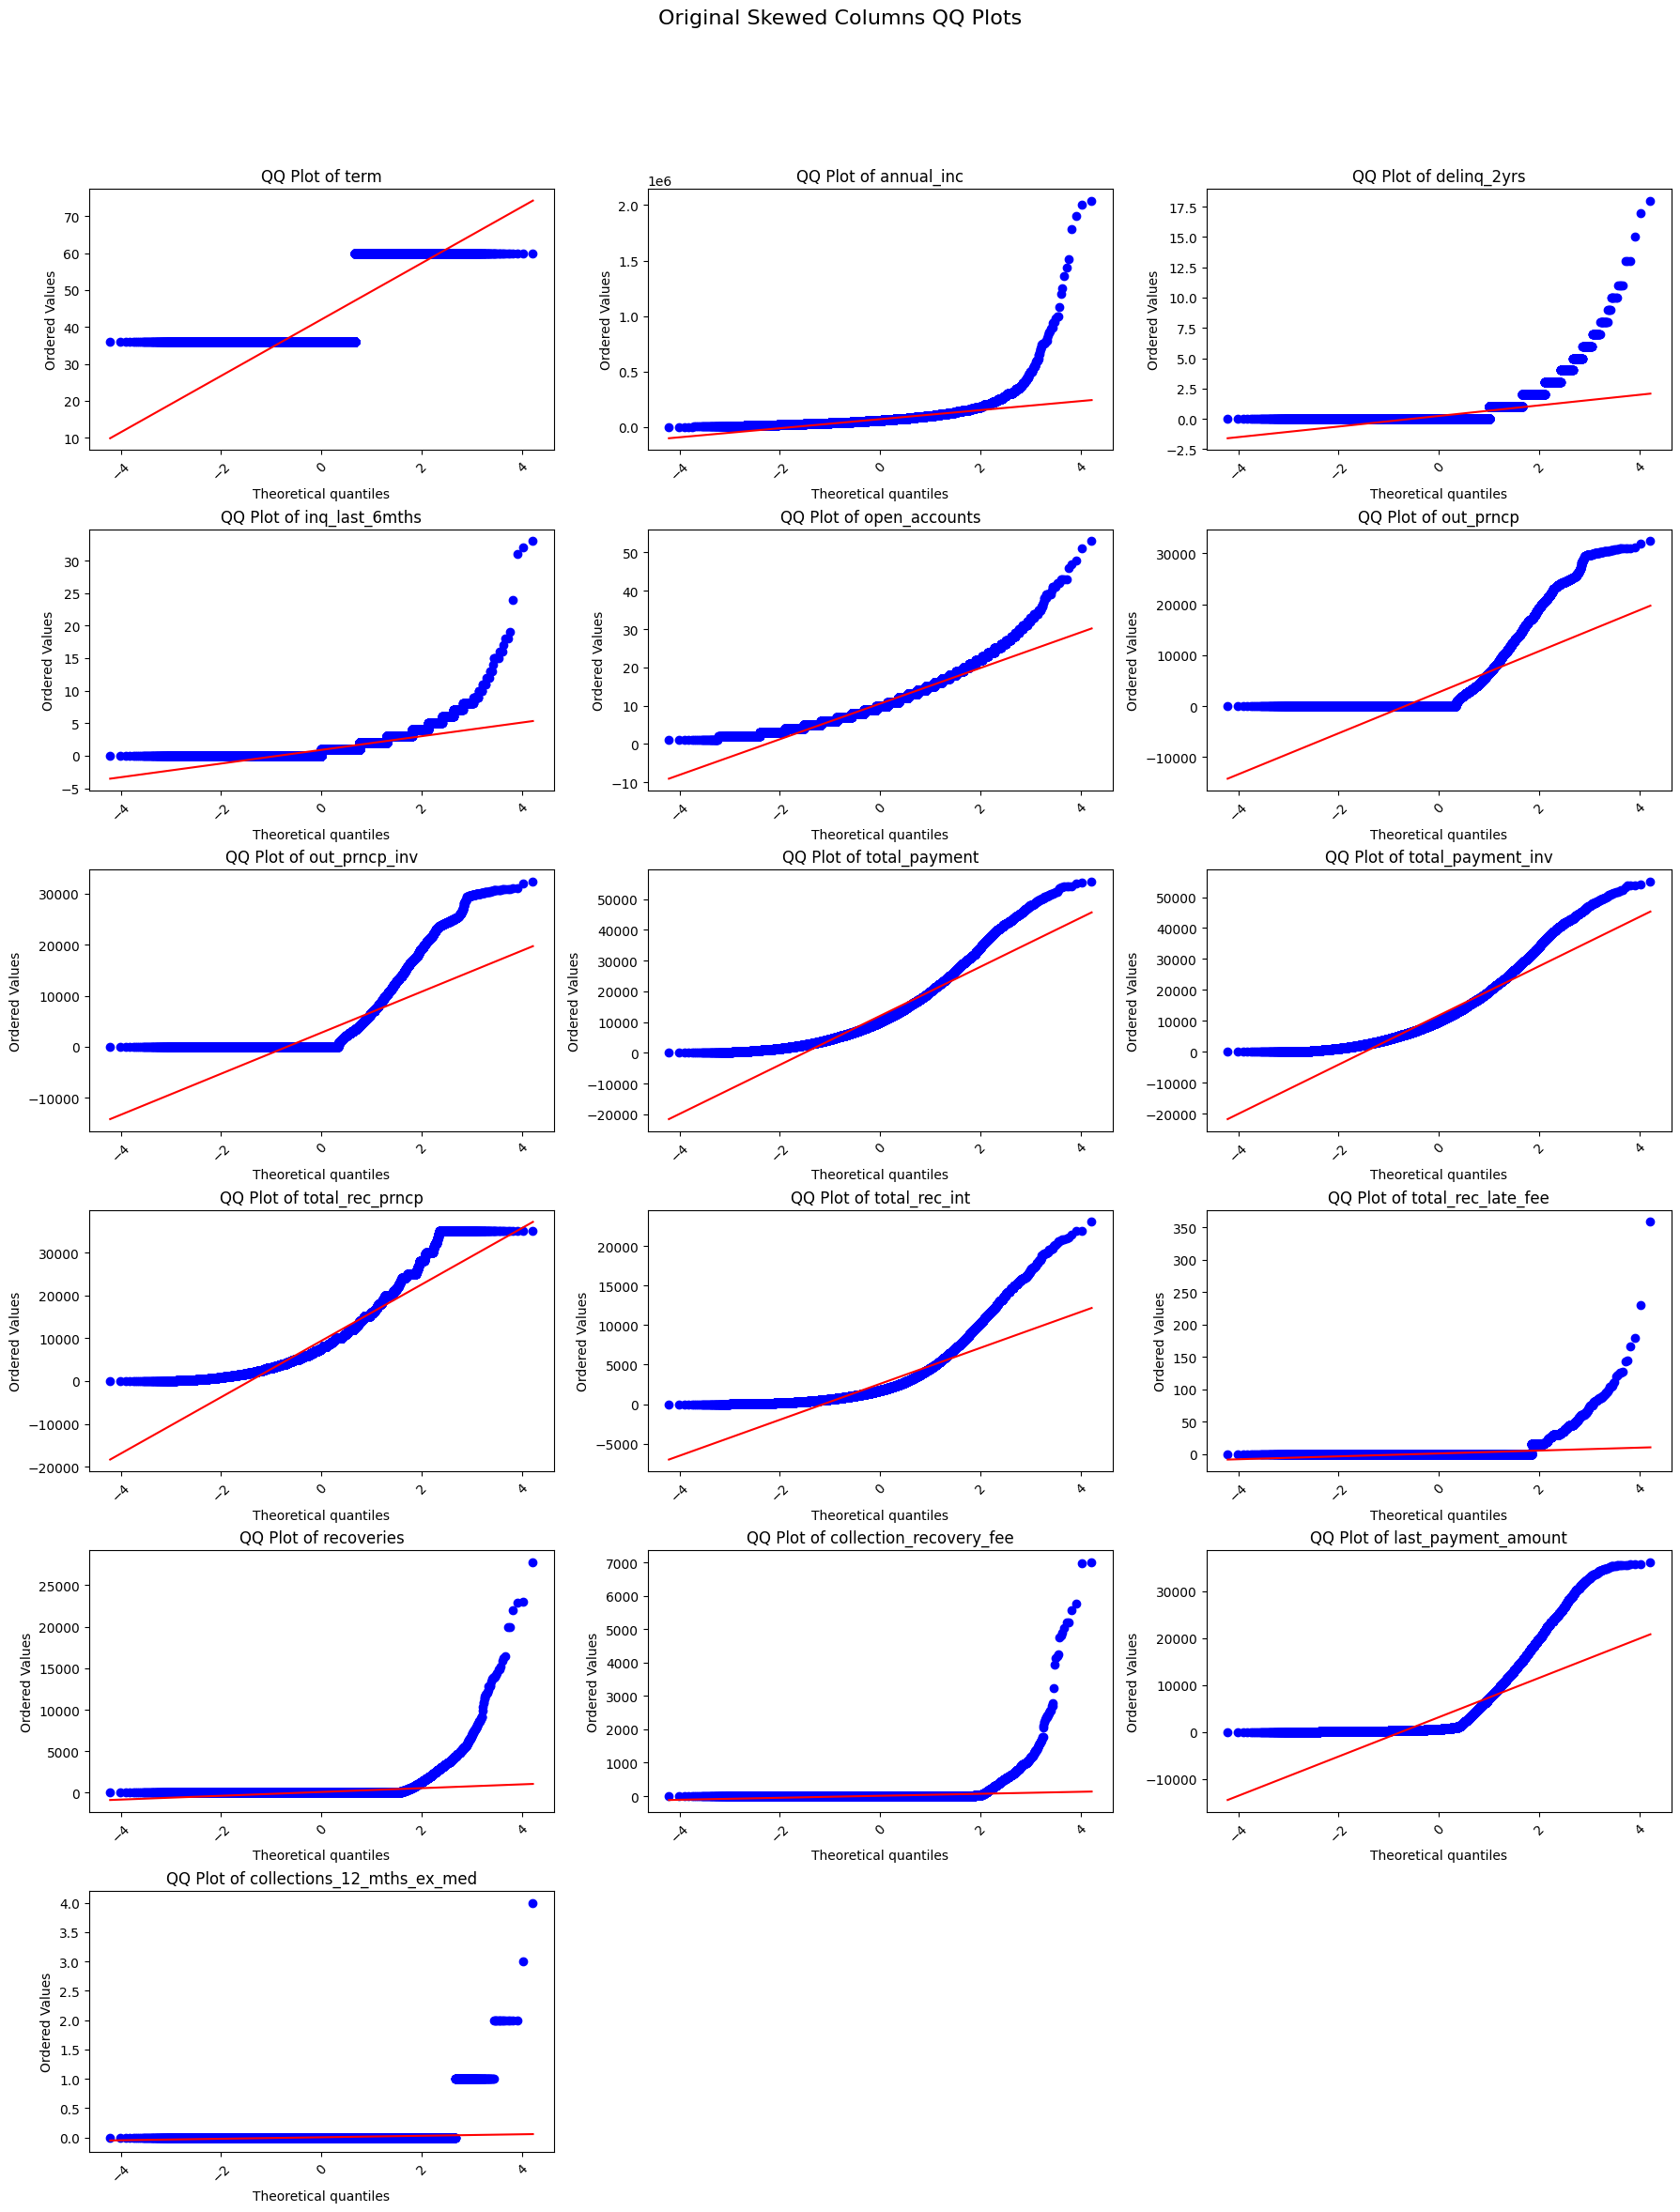

Skewness transformed data saved to D:\Aicore\EDA_Project\exploratory-data-analysis---customer-loans-in-finance192\skewness_transformed_loan_payments.csv


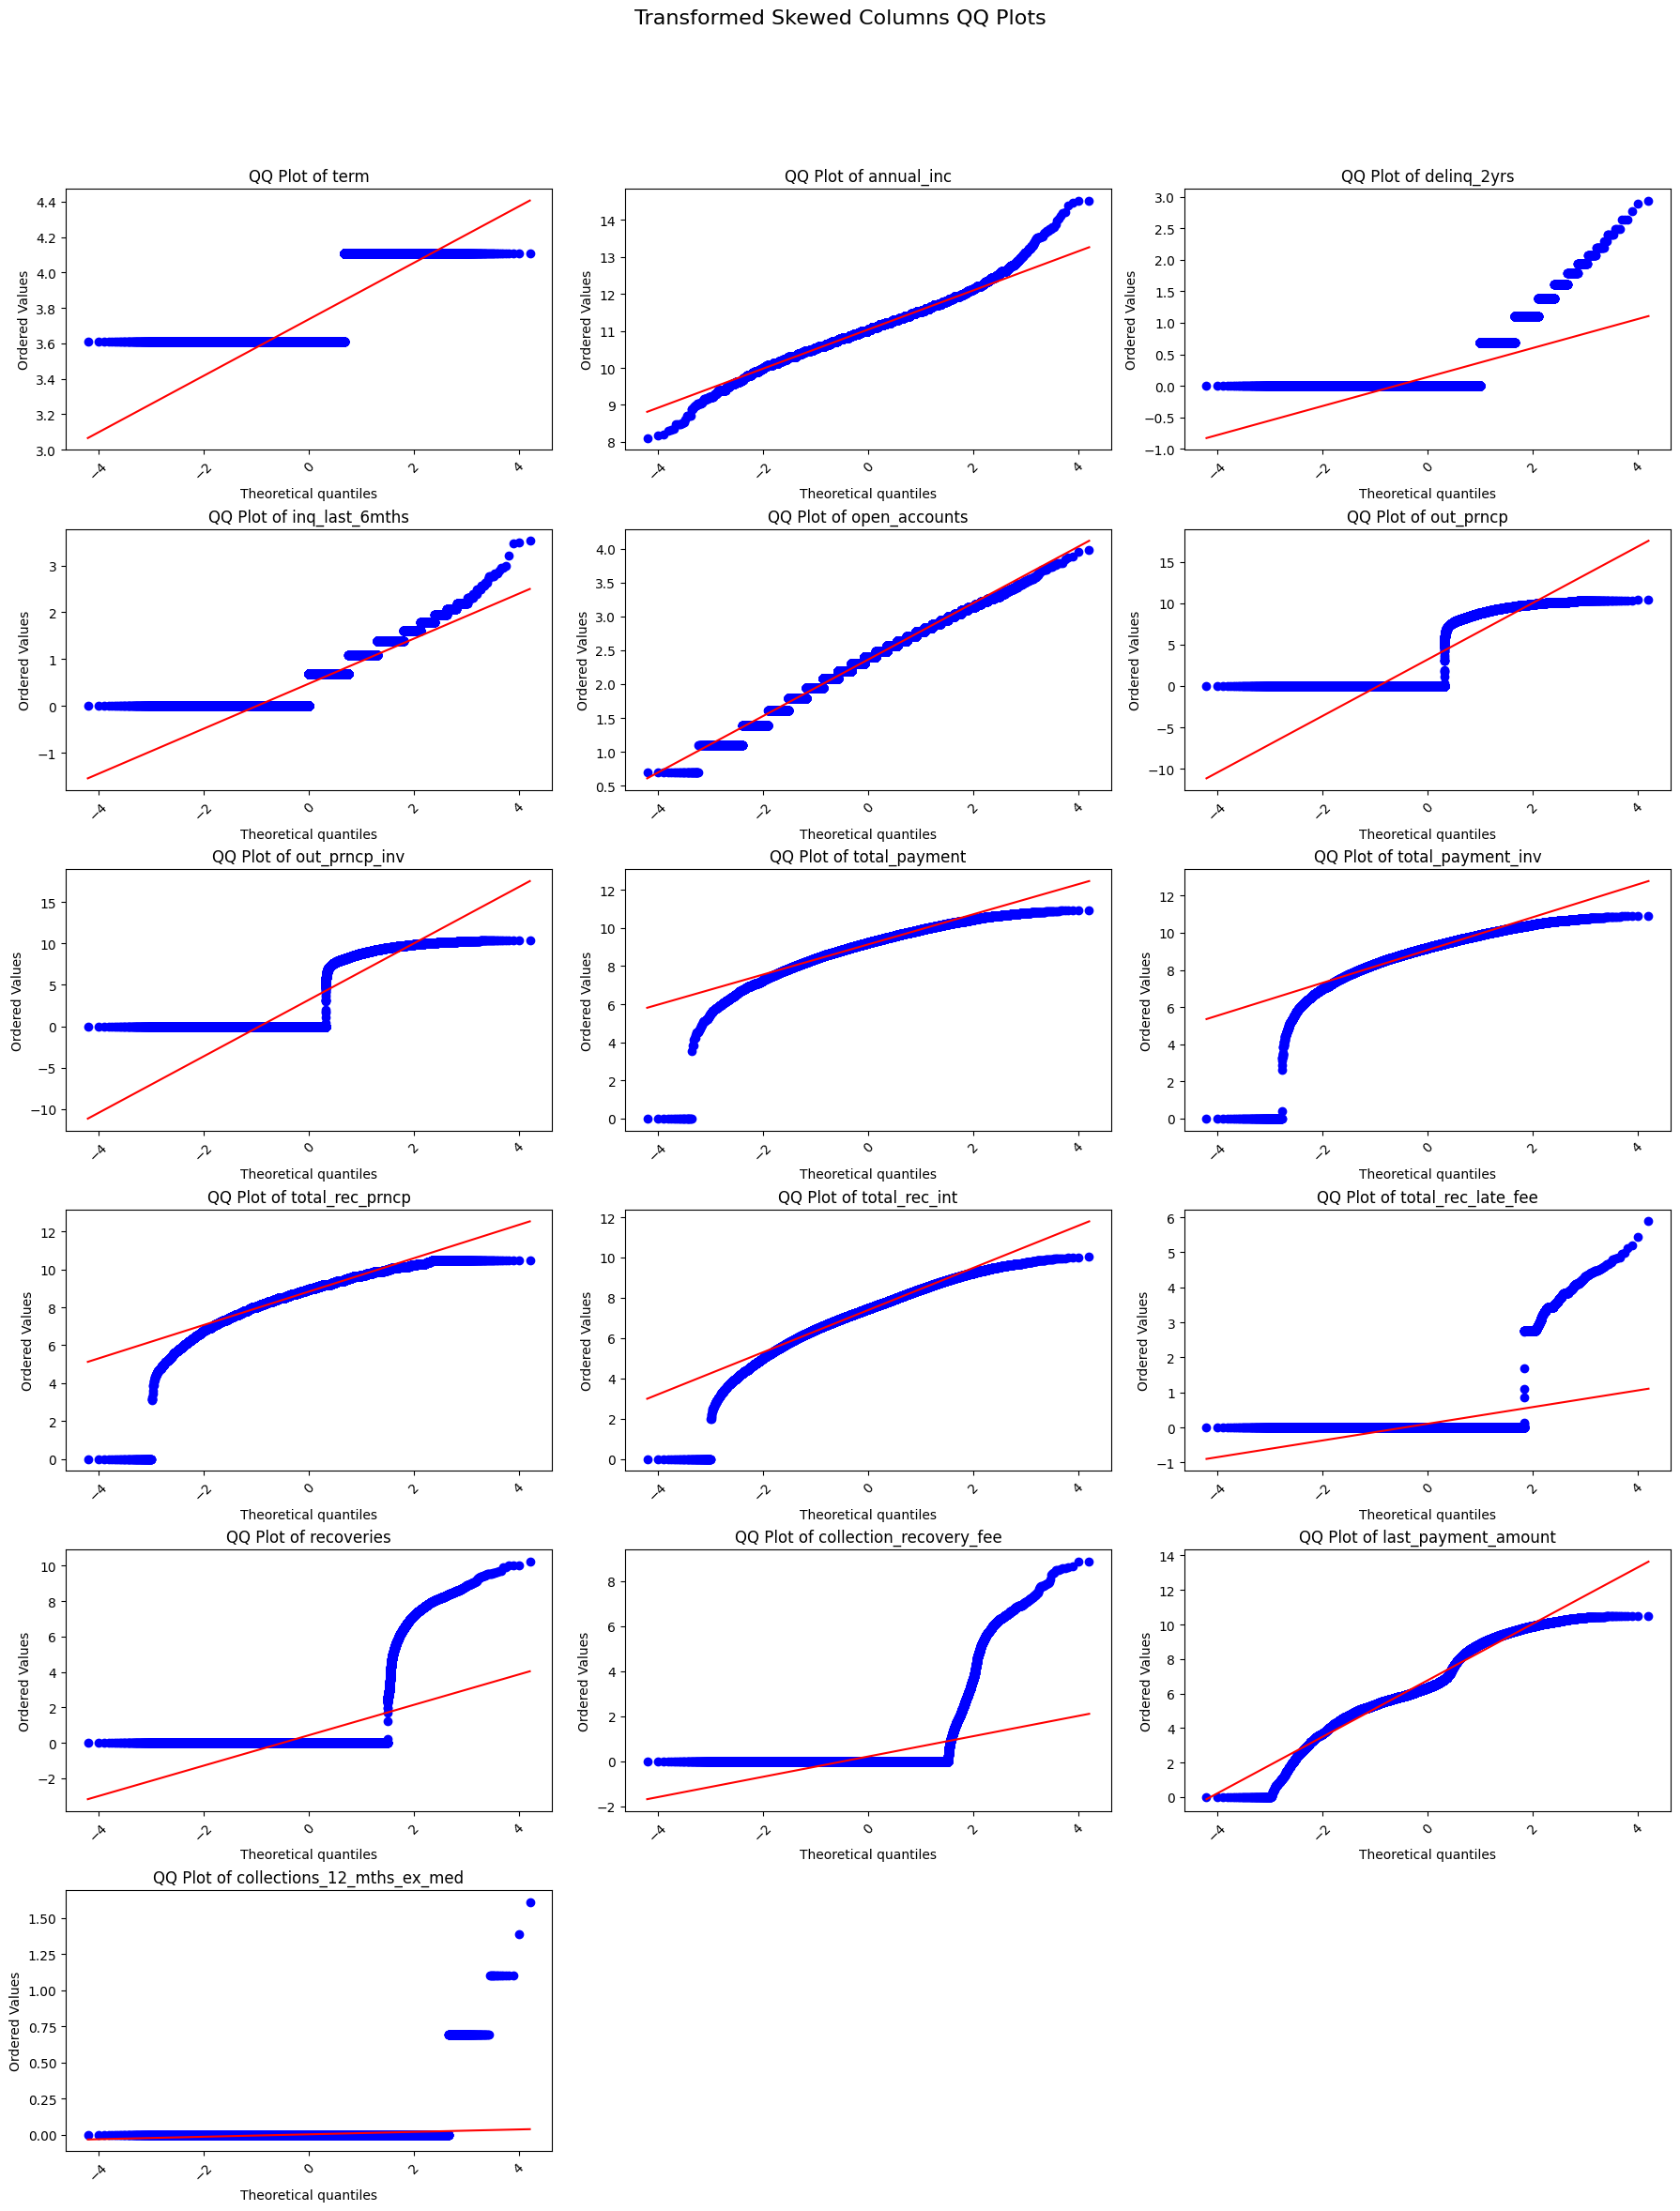

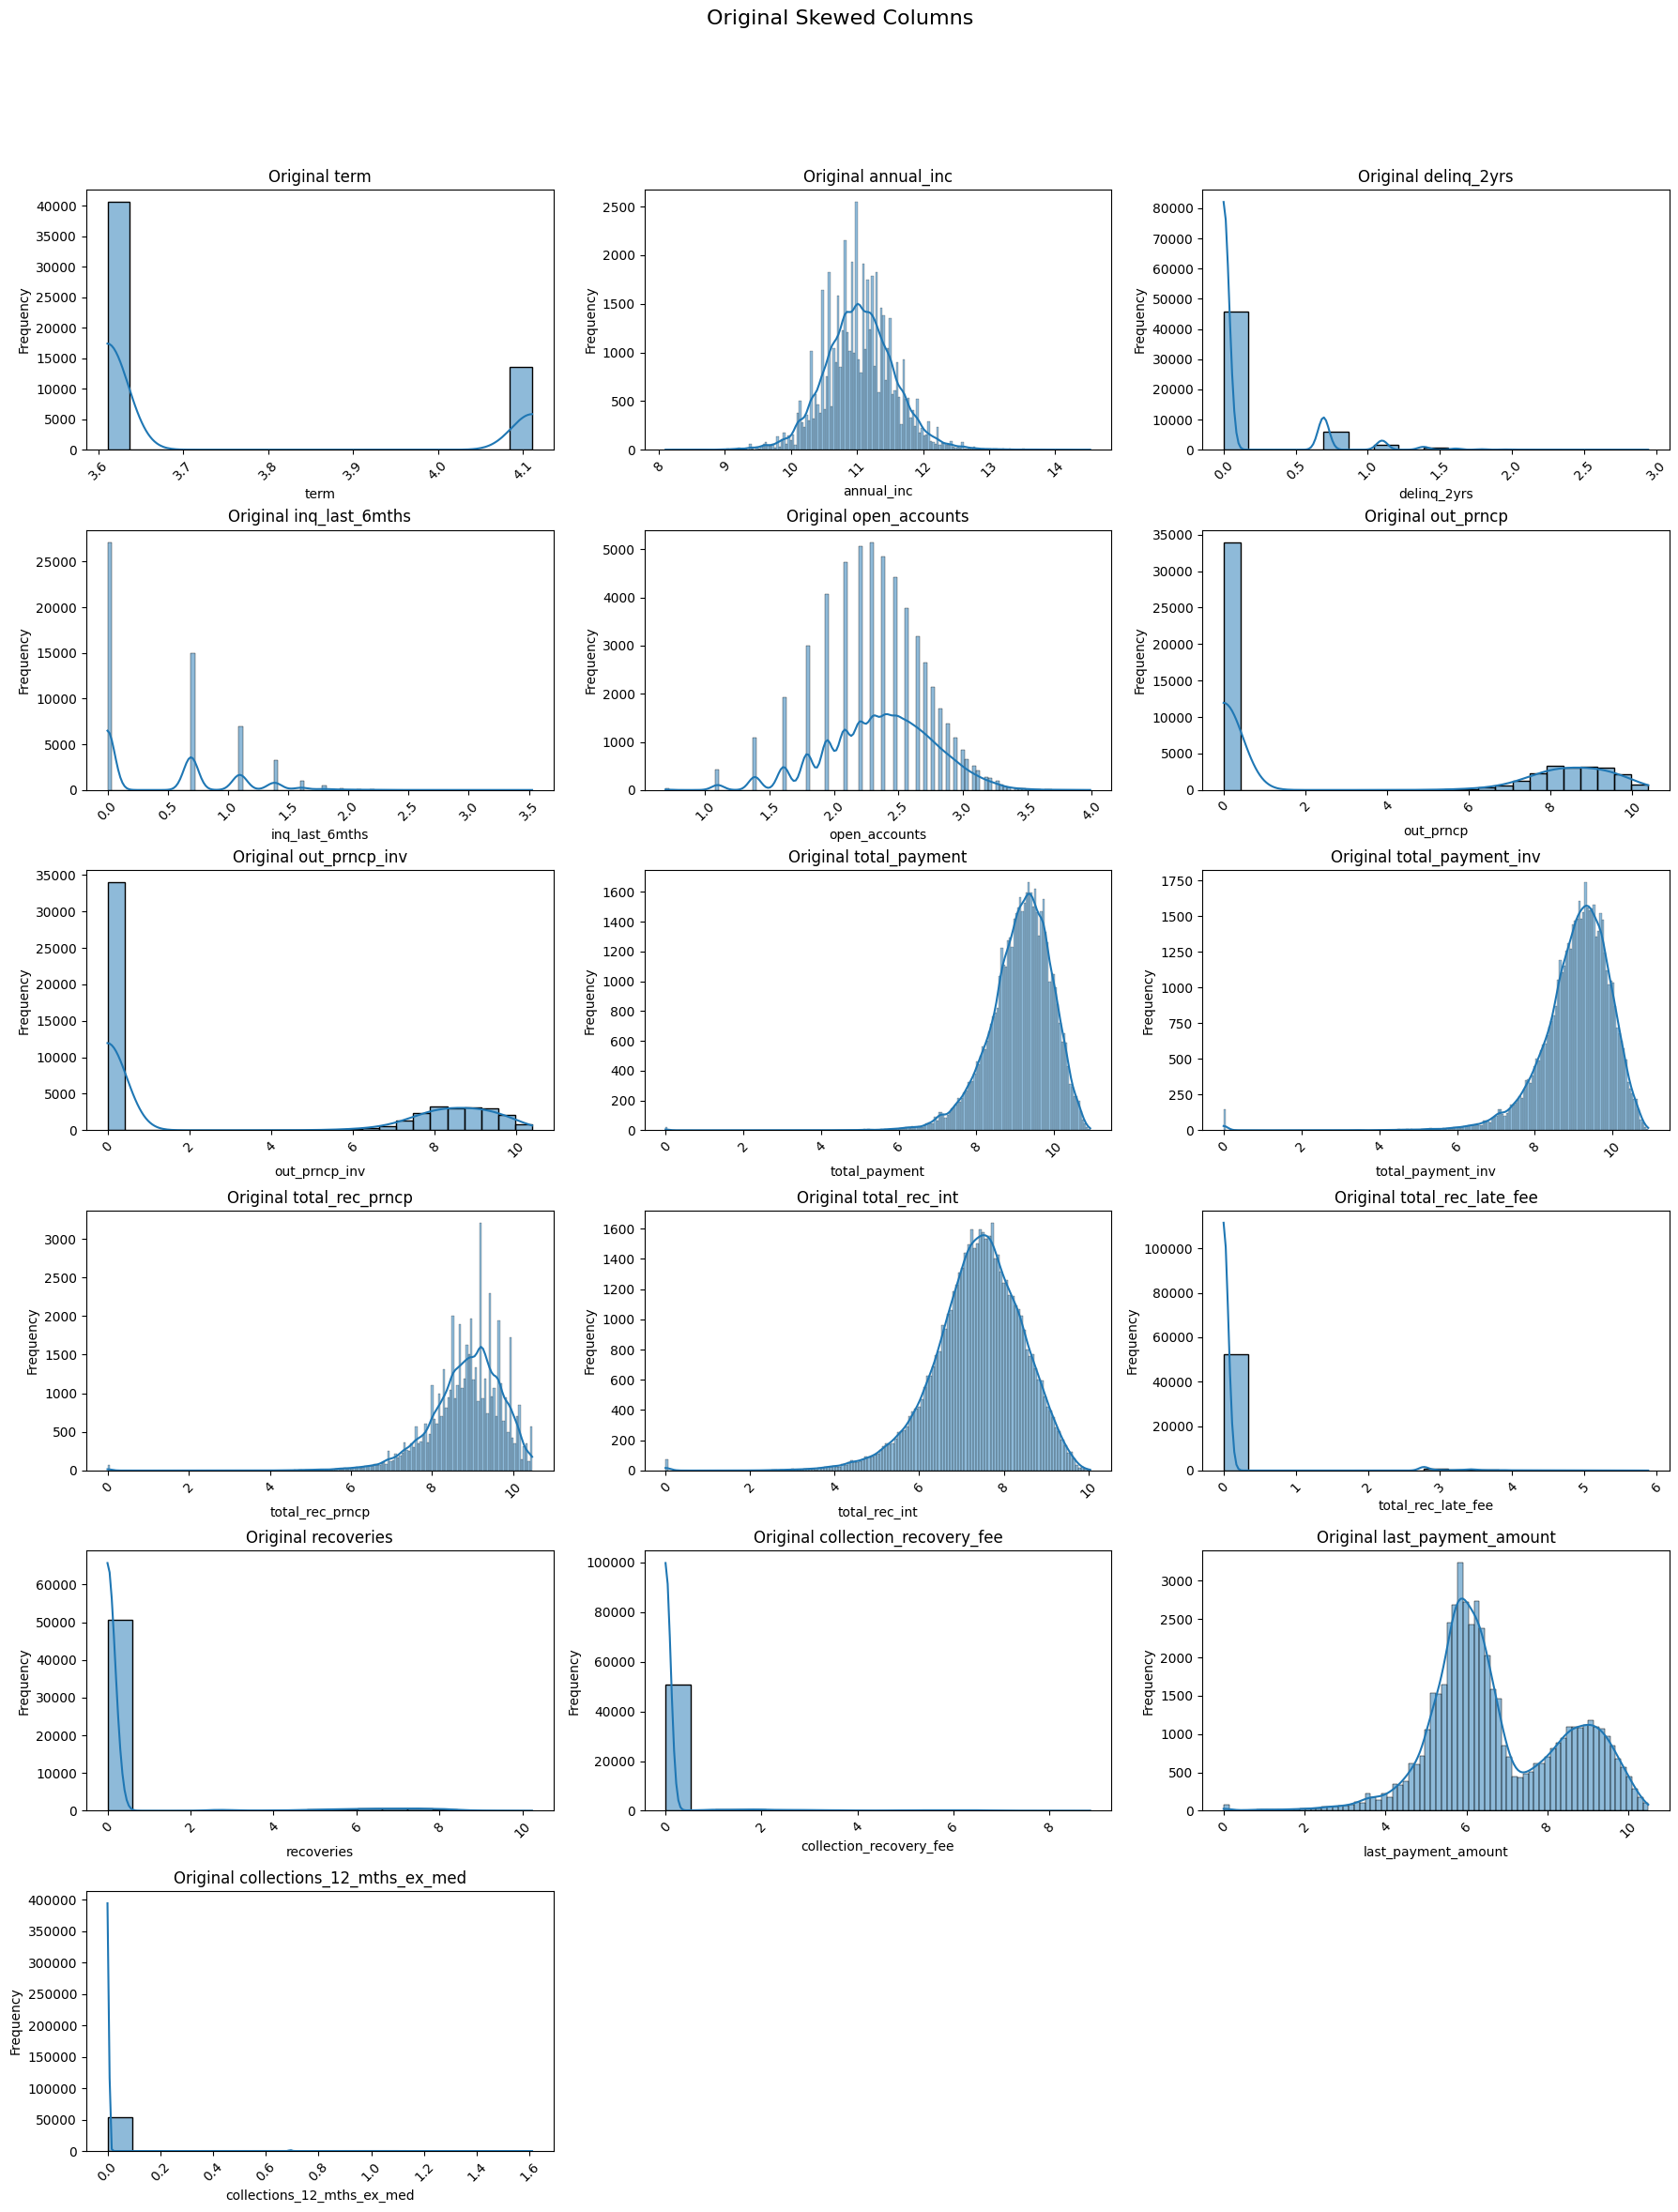

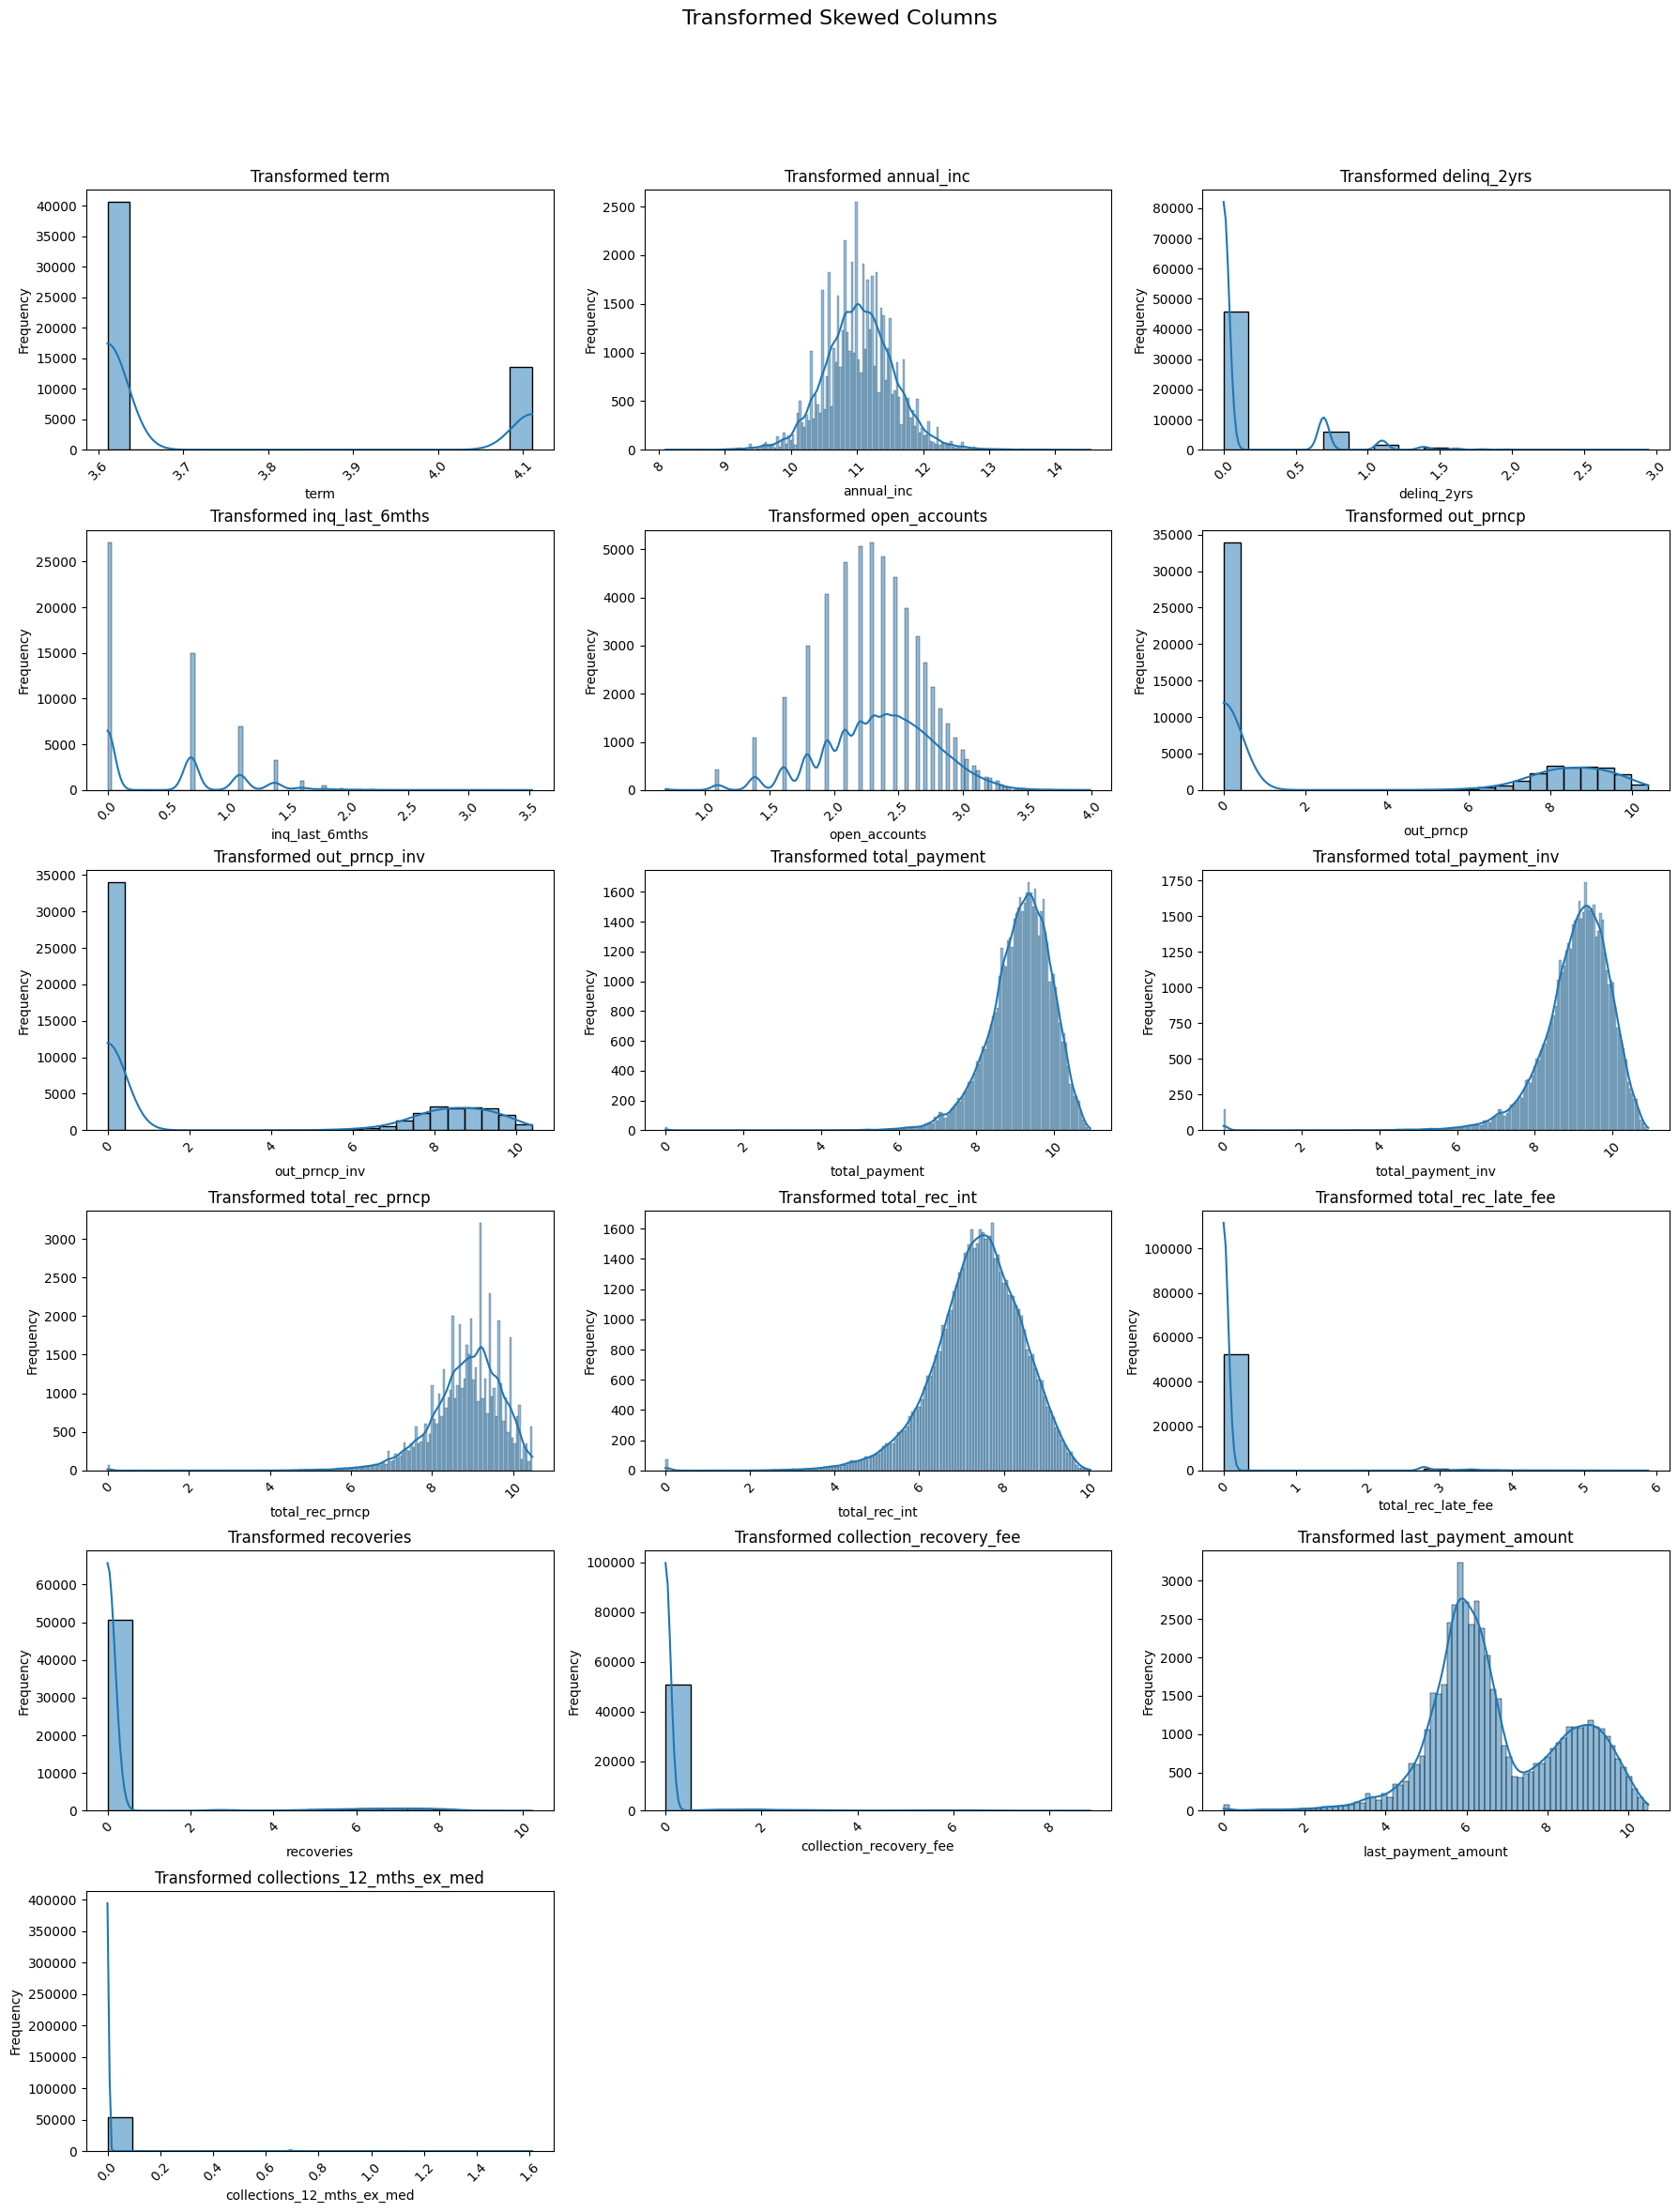

In [4]:
from plotter import Plotter

# Initialize Plotter with the cleaned DataFrame
plotter = Plotter(imputed_df)

# Step 1: Identify skewed columns in the cleaned data
skew_threshold = 1  # You can adjust this threshold as needed
df_transform_cleaned = DataFrameTransform(imputed_df)
skewed_columns = df_transform_cleaned.identify_skewed_columns(skew_threshold)
print(f"\nSkewed Columns (Threshold > {skew_threshold}):\n", skewed_columns)

# Initialize Plotter to visualize skewed columns
plotter = Plotter(imputed_df)

# Visualize skewed columns using QQ plots
if not skewed_columns.empty:
    plotter.plot_qq_plots(skewed_columns.index, title="Original Skewed Columns QQ Plots")
else:
    print("No skewed columns found with the given threshold.")

# Step 2: Transform skewed columns to reduce skewness
df_transform_cleaned.transform_skewed_columns(skew_threshold)

# Access the transformed DataFrame
transformed_skewed_df = df_transform_cleaned.df

# Save the transformed DataFrame after skewness reduction
skewness_transformed_csv_file_path = 'D:\\Aicore\\EDA_Project\\exploratory-data-analysis---customer-loans-in-finance192\\skewness_transformed_loan_payments.csv'
transformed_skewed_df.to_csv(skewness_transformed_csv_file_path, index=False)
print(f"Skewness transformed data saved to {skewness_transformed_csv_file_path}")

# Step 4: Visualize the results of the transformations using QQ plots
transformed_skewed_df = pd.read_csv(skewness_transformed_csv_file_path)
plotter = Plotter(transformed_skewed_df)

# Visualize the transformed skewed columns using QQ plots
if not skewed_columns.empty:
    plotter.plot_qq_plots(skewed_columns.index, title="Transformed Skewed Columns QQ Plots")
else:
    print("No skewed columns found with the given threshold.")

# Plot comparison of skewness before and after transformation using histograms
if not skewed_columns.empty:
    plotter.plot_skewness_comparison(original_df=imputed_df, transformed_df=transformed_skewed_df, columns=skewed_columns.index)
else:
    print("No skewed columns found with the given threshold.")


## Task 5: Remove Outliers from the Data

We will identify and remove outliers using the IQR method.


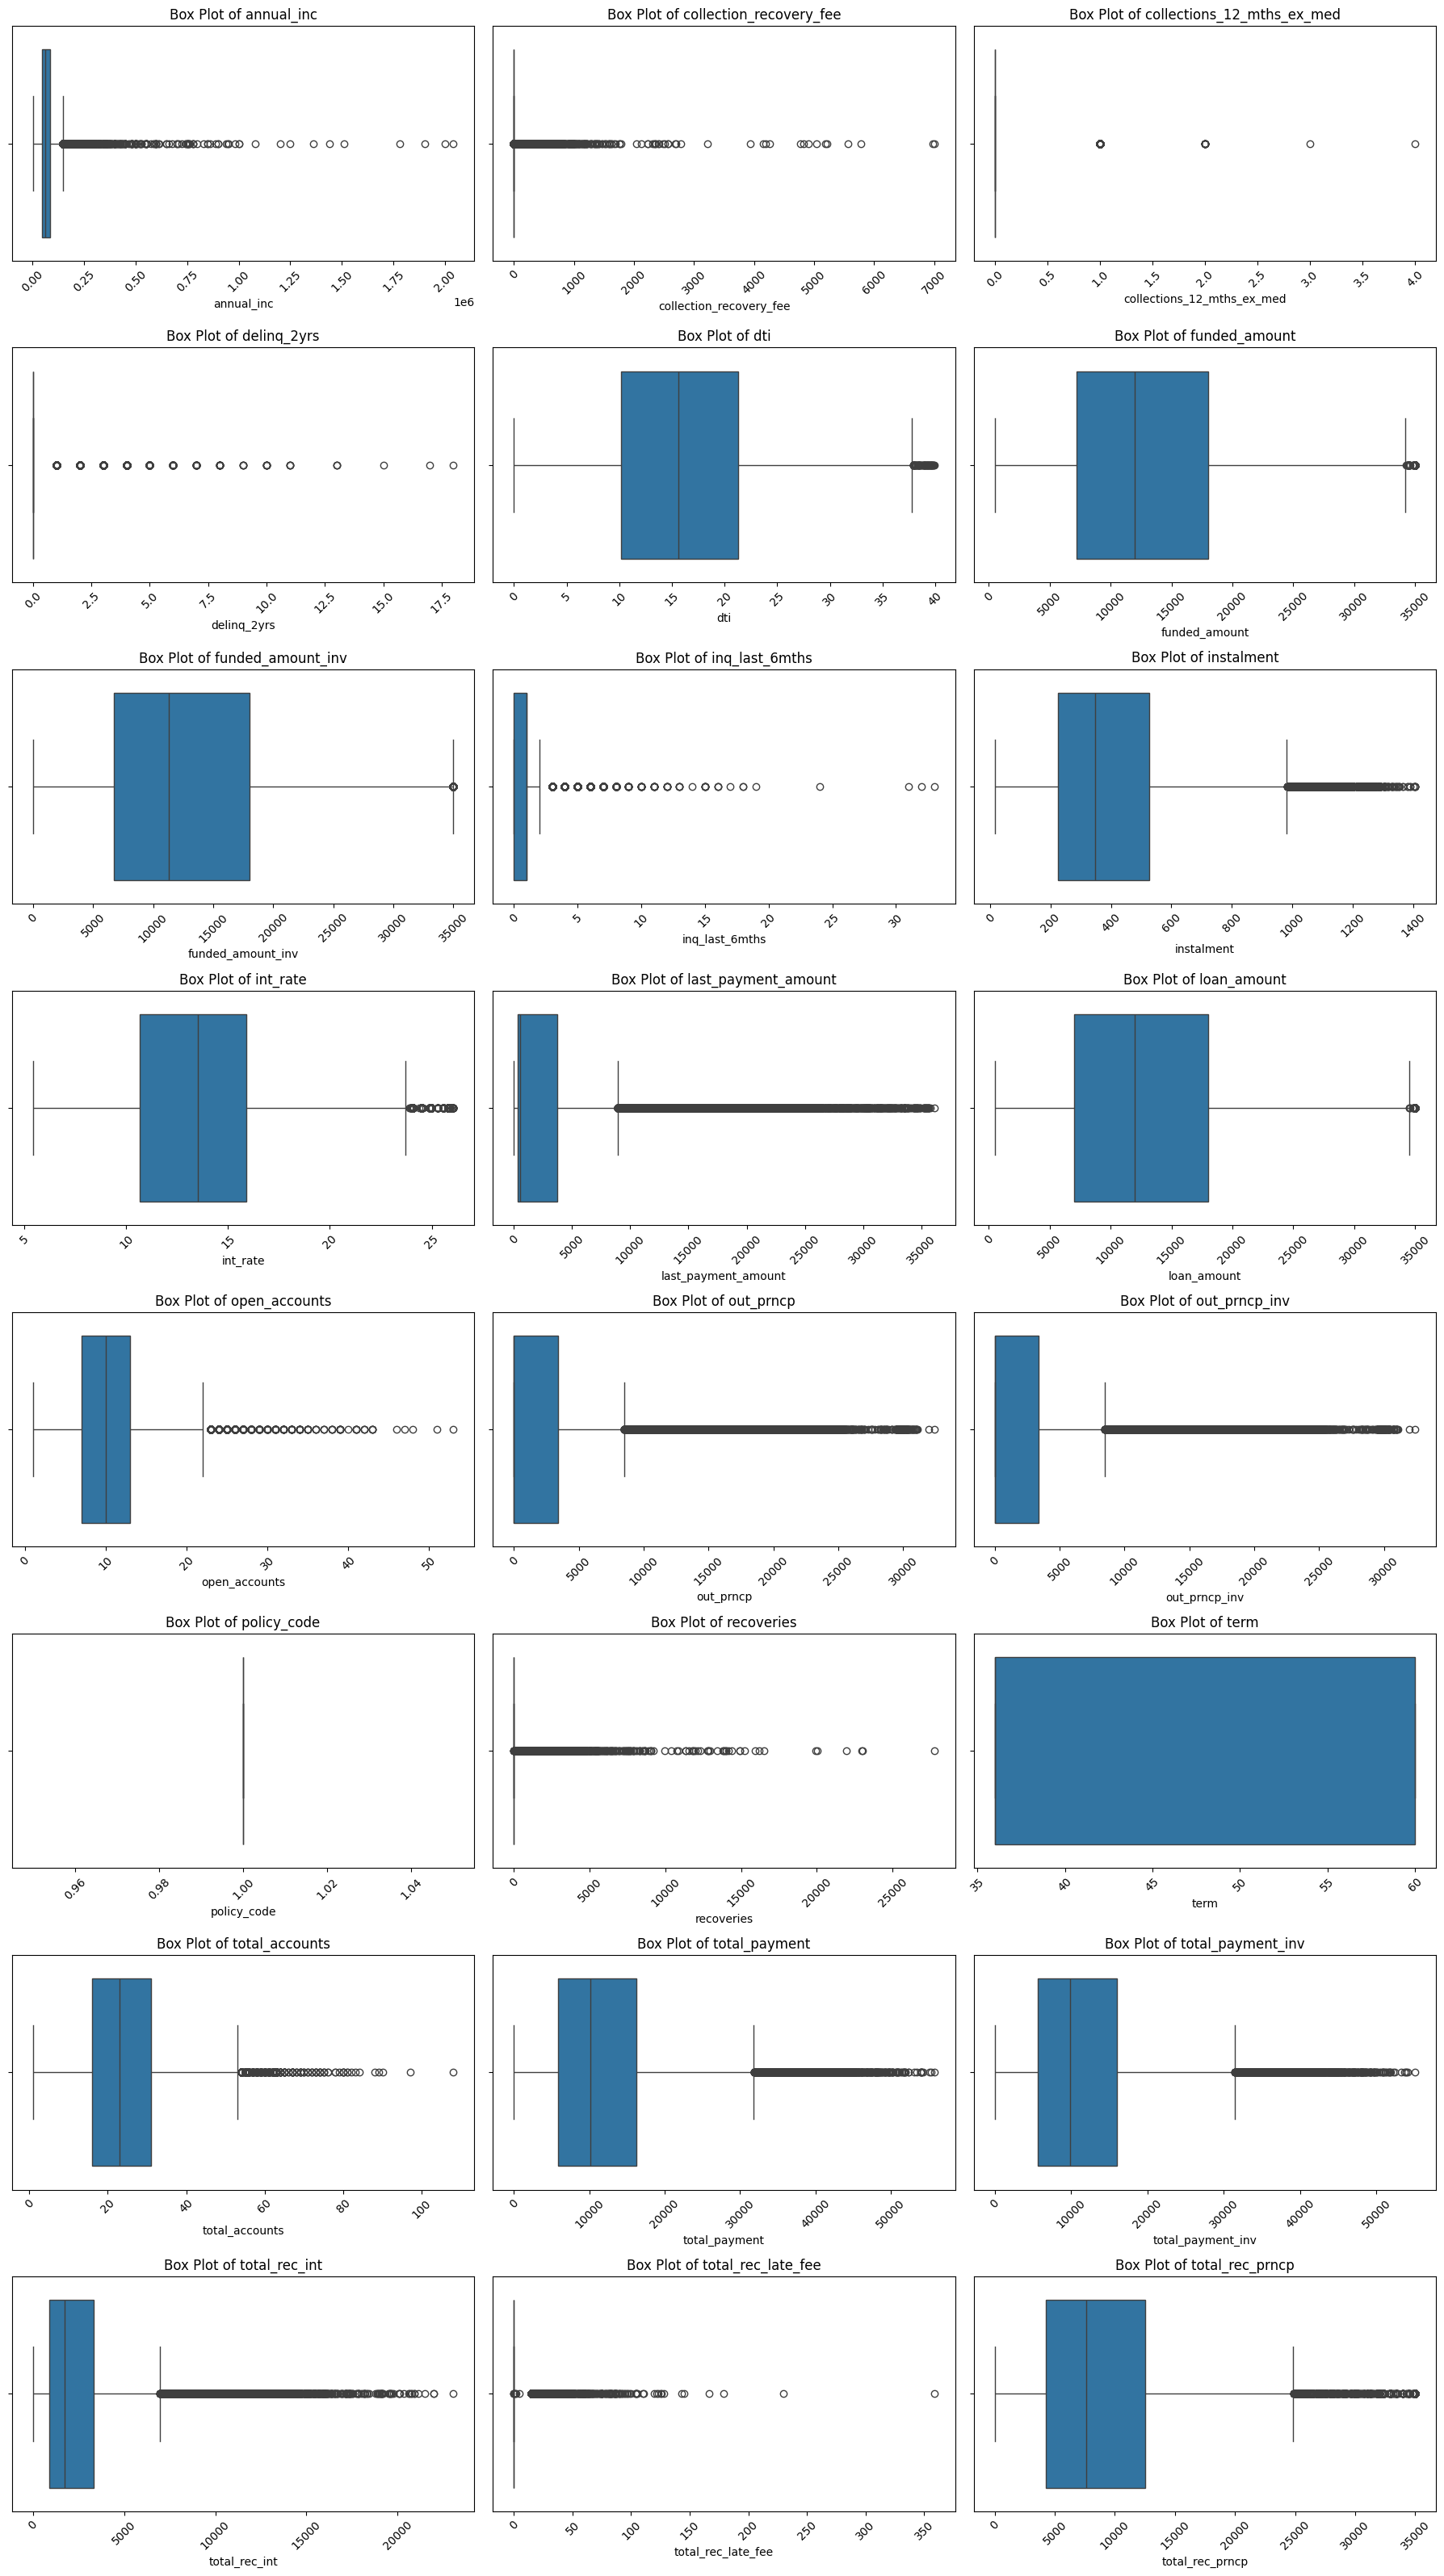

Data with outliers removed saved to D:\Aicore\EDA_Project\exploratory-data-analysis---customer-loans-in-finance192\outliers_removed_loan_payments.csv


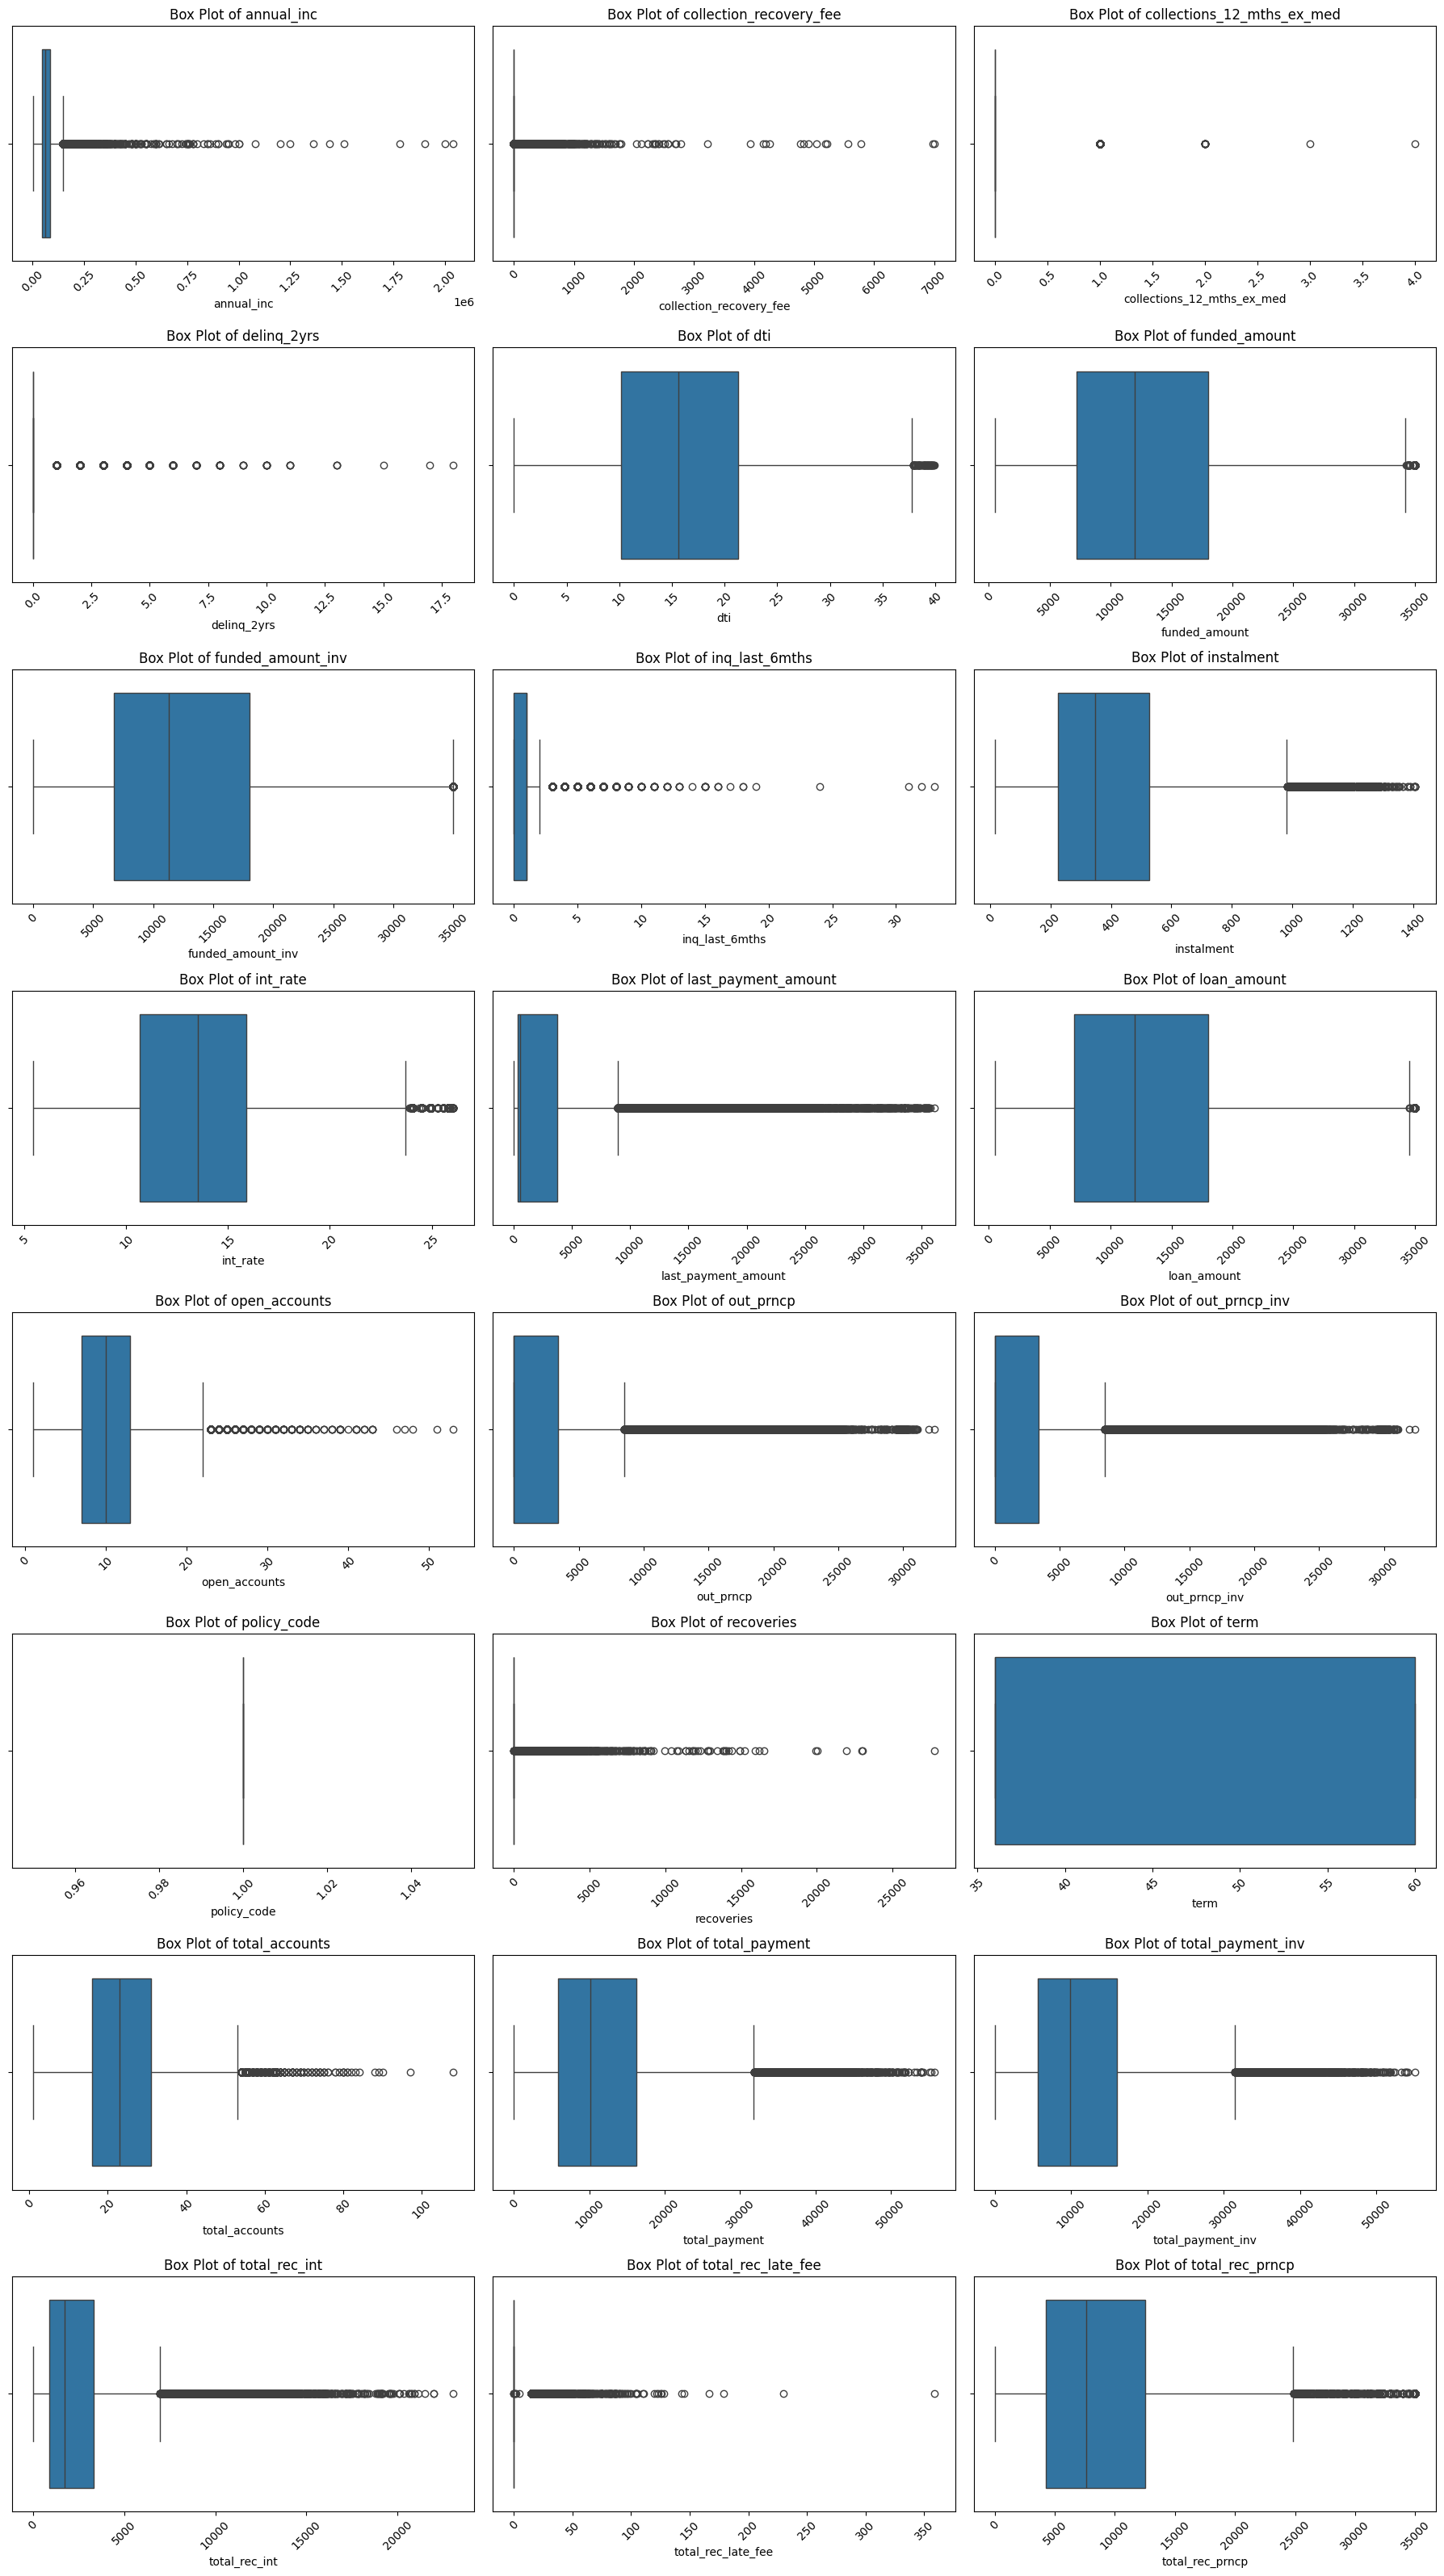

In [5]:
from dataframe_transform import DataFrameTransform
from plotter import Plotter

# Load the cleaned CSV file
df_no_outliers = pd.read_csv(cleaned_csv_file_path)

# Initialize Plotter with the cleaned DataFrame
plotter_no_outliers = Plotter(df_no_outliers)

# Step 1: Visualize data to identify outliers
numeric_columns = df_no_outliers.select_dtypes(include='number').columns.difference(['id', 'member_id'])
plotter_no_outliers.plot_boxplot(numeric_columns)

# Step 2: Remove outliers
df_transform_no_outliers = DataFrameTransform(df_no_outliers)
df_no_outliers = df_transform_no_outliers.remove_outliers(numeric_columns)

# Save the DataFrame with outliers removed back to CSV
outliers_removed_csv_file_path = 'D:\\Aicore\\EDA_Project\\exploratory-data-analysis---customer-loans-in-finance192\\outliers_removed_loan_payments.csv'
df_no_outliers.to_csv(outliers_removed_csv_file_path, index=False)
print(f"Data with outliers removed saved to {outliers_removed_csv_file_path}")

# Step 3: Re-visualize the data to ensure outliers are removed
plotter_no_outliers.plot_boxplot(numeric_columns)


## Task 6: Drop Overly Correlated Columns

We will identify and remove highly correlated columns to improve the quality of the data.


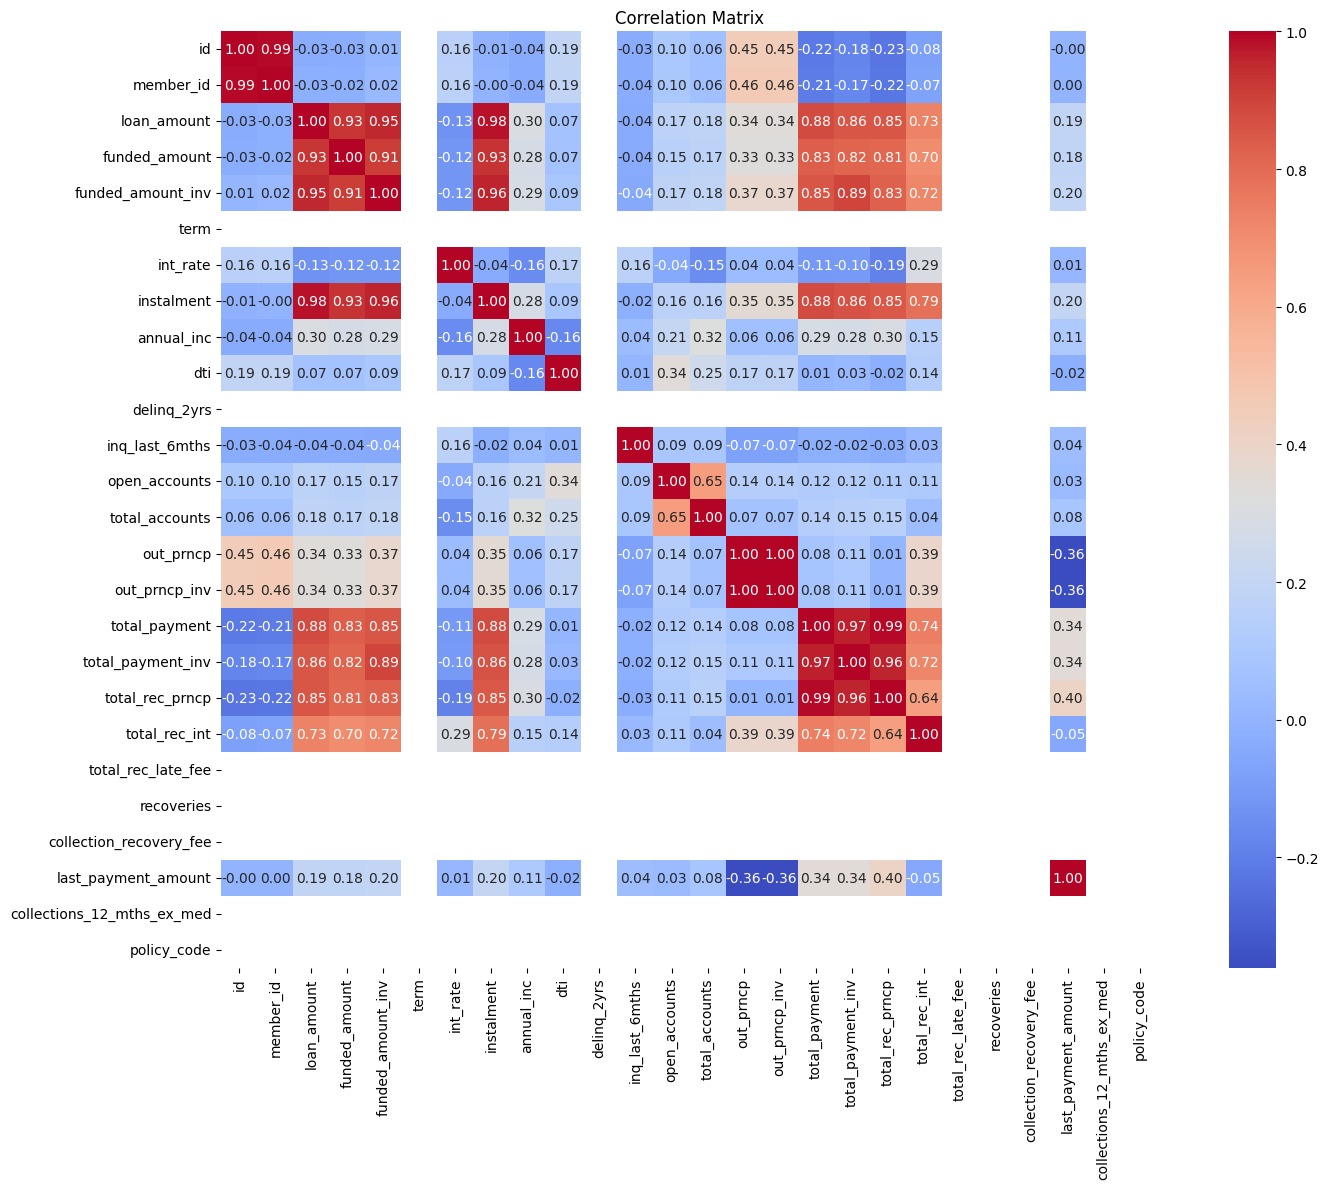

Highly correlated columns (Threshold > 0.9):
 ['instalment', 'total_payment_inv', 'member_id', 'funded_amount', 'total_rec_prncp', 'out_prncp_inv', 'funded_amount_inv']
Column 'member_id' is highly correlated with 'id' (correlation = 0.99).
Column 'funded_amount' is highly correlated with 'loan_amount' (correlation = 0.93).
Column 'funded_amount_inv' is highly correlated with 'loan_amount' (correlation = 0.95).
Column 'funded_amount_inv' is highly correlated with 'funded_amount' (correlation = 0.91).
Column 'instalment' is highly correlated with 'loan_amount' (correlation = 0.98).
Column 'instalment' is highly correlated with 'funded_amount' (correlation = 0.93).
Column 'instalment' is highly correlated with 'funded_amount_inv' (correlation = 0.96).
Column 'out_prncp_inv' is highly correlated with 'out_prncp' (correlation = 1.00).
Column 'total_payment_inv' is highly correlated with 'total_payment' (correlation = 0.97).
Column 'total_rec_prncp' is highly correlated with 'total_payment'

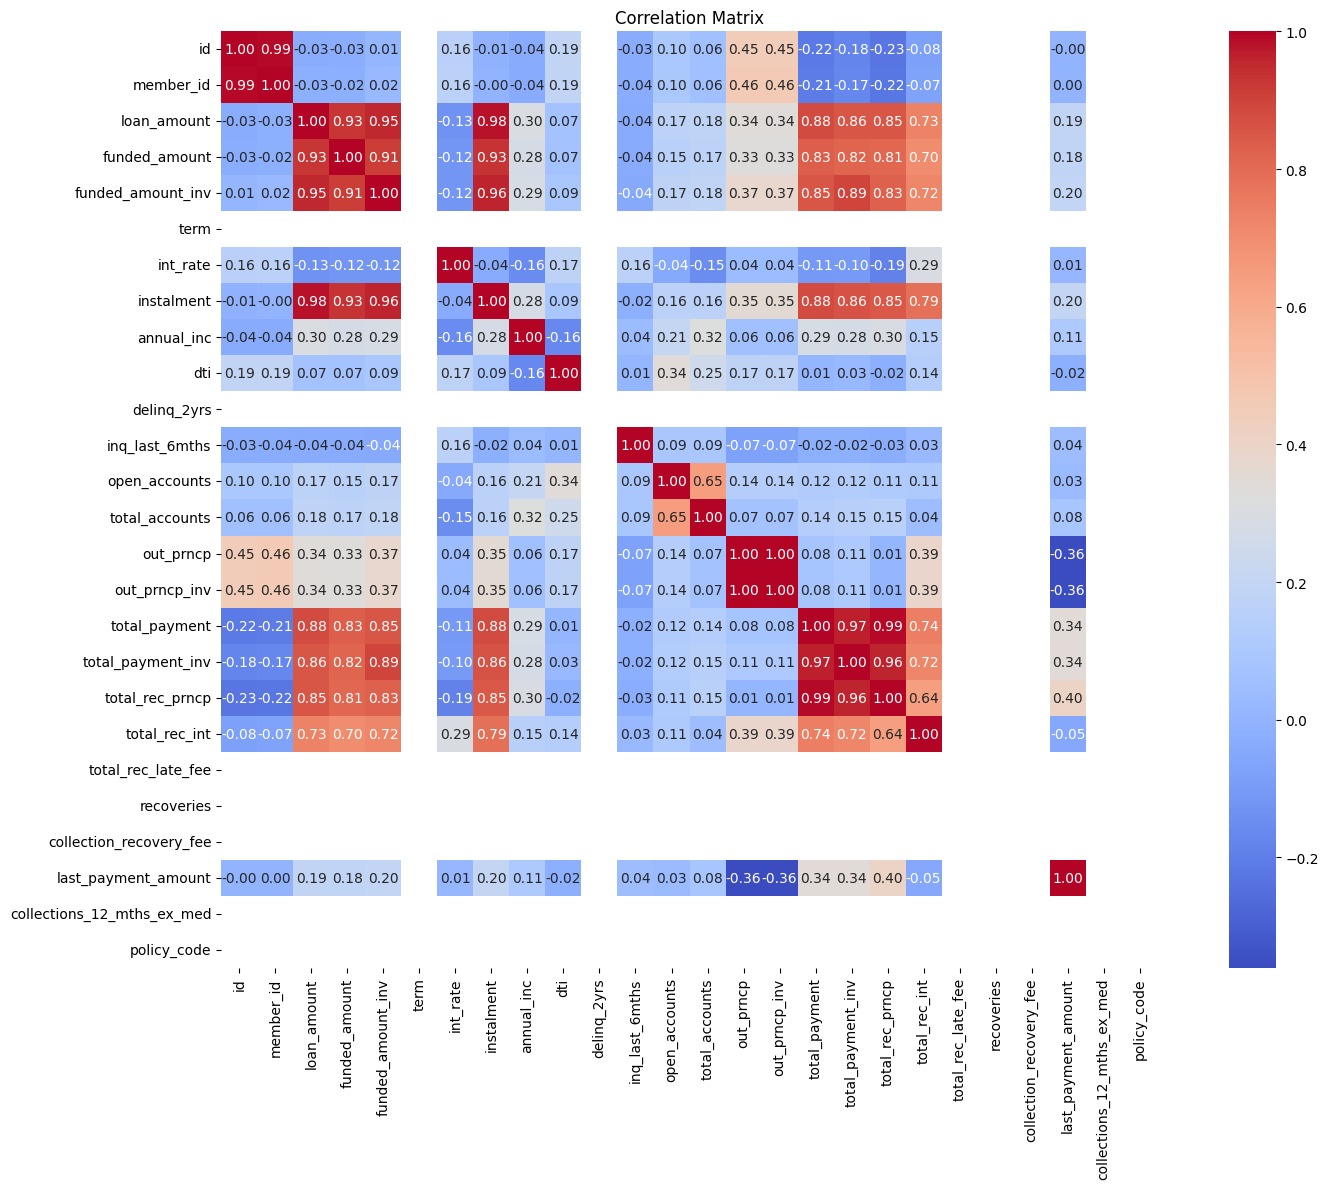

Highly correlated columns (Threshold > 0.9):
 ['instalment', 'total_payment_inv', 'member_id', 'funded_amount', 'total_rec_prncp', 'out_prncp_inv', 'funded_amount_inv']
Data with highly correlated columns removed saved to D:\Aicore\EDA_Project\exploratory-data-analysis---customer-loans-in-finance192\cleaned_loan_payments_no_correlated.csv


In [6]:
from correlation_analysis import CorrelationAnalysis

# Load the CSV file with outliers removed
df = pd.read_csv(outliers_removed_csv_file_path)

# Initialize CorrelationAnalysis with the DataFrame and a correlation threshold
threshold = 0.9
correlation_analysis = CorrelationAnalysis(df, threshold)

# Step 1: Compute the correlation matrix
correlation_matrix = correlation_analysis.compute_correlation_matrix()

# Step 2: Visualize the correlation matrix
correlation_analysis.visualize_correlation_matrix(correlation_matrix)

# Step 3: Identify highly correlated columns
highly_correlated_columns = correlation_analysis.identify_highly_correlated_columns(correlation_matrix)
print(f"Highly correlated columns (Threshold > {threshold}):\n", highly_correlated_columns)

# Step 4: Remove highly correlated columns from the dataset
cleaned_df = correlation_analysis.remove_highly_correlated_columns(highly_correlated_columns)

# Save the cleaned DataFrame back to CSV
cleaned_csv_output_file_path = 'D:\\Aicore\\EDA_Project\\exploratory-data-analysis---customer-loans-in-finance192\\cleaned_loan_payments_no_correlated.csv'
cleaned_df.to_csv(cleaned_csv_output_file_path, index=False)
print(f"Data with highly correlated columns removed saved to {cleaned_csv_output_file_path}")
